# 타이타닉 생존자 예측을 위한 EDA

## 라이브러리 호출 및 전처리

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [25]:
plt.rcParams["font.family"] = "Malgun Gothic"
plt.rcParams["axes.unicode_minus"] = False

In [26]:
import seaborn as sns
df = sns.load_dataset("titanic")
df.head(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [27]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [29]:
missing_values = df.isnull().sum()
missing_percent = (missing_values / len(df)) * 100
missing_percent

survived        0.000000
pclass          0.000000
sex             0.000000
age            19.865320
sibsp           0.000000
parch           0.000000
fare            0.000000
embarked        0.224467
class           0.000000
who             0.000000
adult_male      0.000000
deck           77.216611
embark_town     0.224467
alive           0.000000
alone           0.000000
dtype: float64

In [30]:
df["age"] = df["age"].fillna(df["age"].mean())
df["embarked"] = df["embarked"].fillna(df["embarked"].mode()[0])

In [31]:
survived_count = df["survived"].value_counts()
survived_rate = df["survived"].mean()
print(f"생존자: {survived_count[1]}명")
print(f"사망자: {survived_count[0]}명")
print(f"생존율: {survived_rate:.2%}")

생존자: 342명
사망자: 549명
생존율: 38.38%


## 1. 성별에 따른 생존율 분석

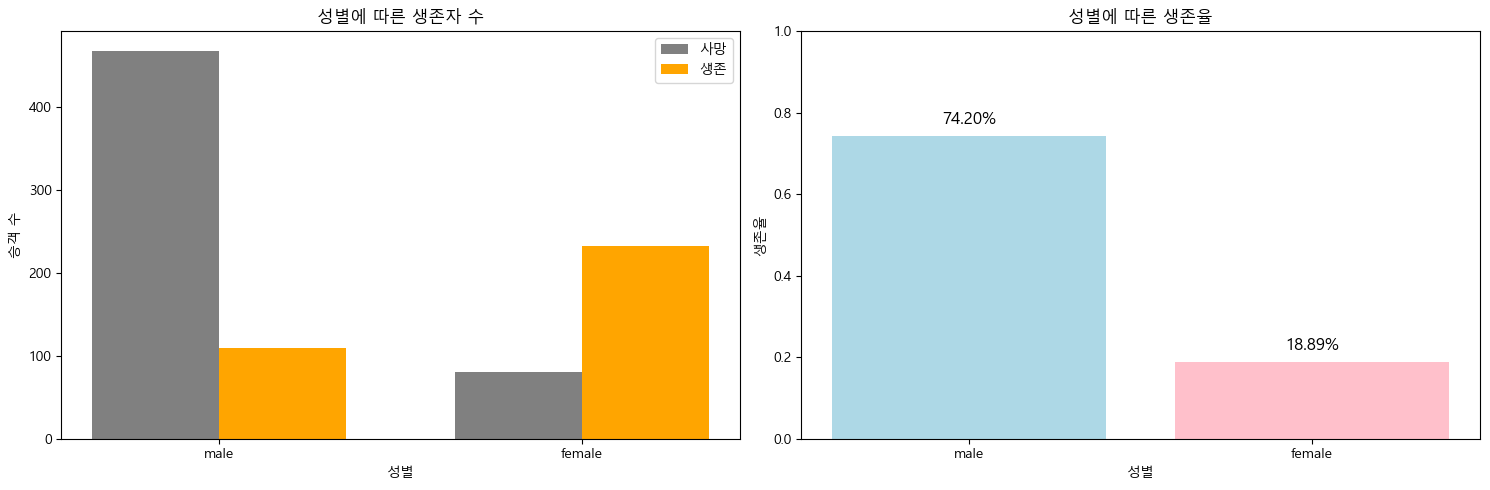

In [32]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# 1. 성별에 따른 생존자 수 (matplotlib만 사용)
sex_labels = df["sex"].unique()
survived_counts = df[df["survived"] == 1]["sex"].value_counts().reindex(sex_labels, fill_value=0)
dead_counts = df[df["survived"] == 0]["sex"].value_counts().reindex(sex_labels, fill_value=0)

bar_width = 0.35
x = range(len(sex_labels))

axes[0].bar([i - bar_width/2 for i in x], dead_counts, width=bar_width, label="사망", color="gray")
axes[0].bar([i + bar_width/2 for i in x], survived_counts, width=bar_width, label="생존", color="orange")
axes[0].set_xticks(x)
axes[0].set_xticklabels(sex_labels)
axes[0].set_title("성별에 따른 생존자 수")
axes[0].set_xlabel("성별")
axes[0].set_ylabel("승객 수")
axes[0].legend()

# 2. 성별에 따른 생존율 (matplotlib만 사용)
sex_survived = df.groupby("sex")["survived"].mean()
axes[1].bar(sex_labels, sex_survived, color=["lightblue", "pink"])
axes[1].set_title("성별에 따른 생존율")
axes[1].set_xlabel("성별")
axes[1].set_ylabel("생존율")
axes[1].set_ylim(0, 1)
for i, v in enumerate(sex_survived):
    axes[1].text(i, v + 0.02, f"{v:.2%}", ha="center", va="bottom", fontsize=12)
plt.tight_layout()
plt.show()

## 2. 승객 등급에 따른 생존율
- 등급별 생존자 수
- 등급별 생존율
- 등급과 성별 교차표

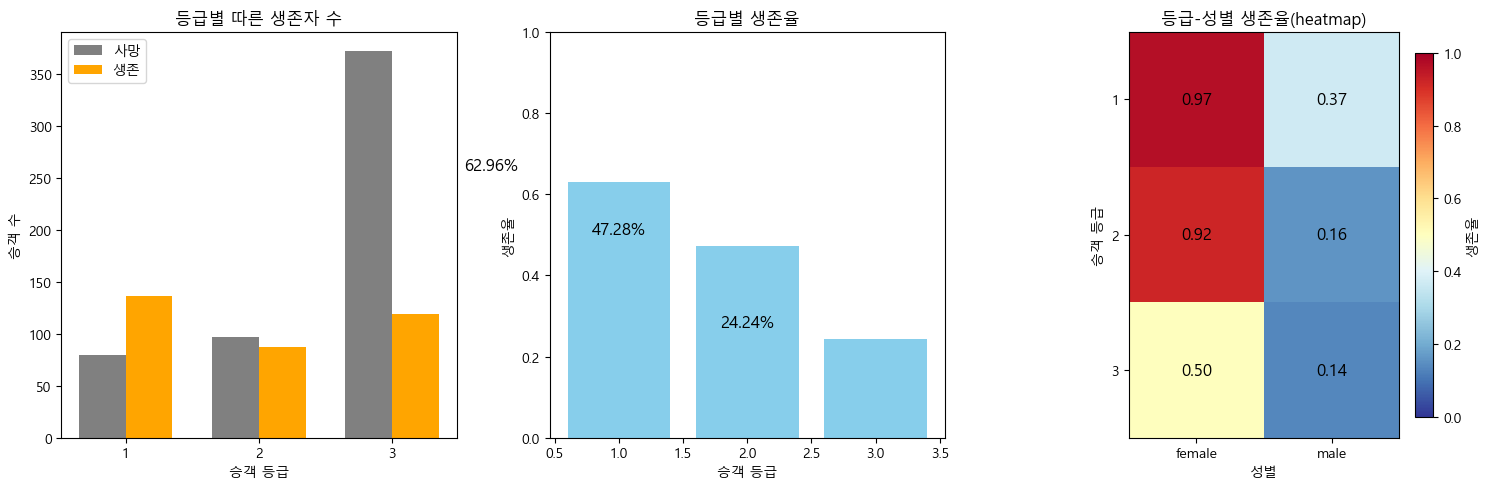

In [33]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# 1. 등급별 생존자 수 (matplotlib만 사용)
pclass_labels = sorted(df["pclass"].unique())
survived_counts = df[df["survived"] == 1]["pclass"].value_counts().reindex(pclass_labels, fill_value=0)
dead_counts = df[df["survived"] == 0]["pclass"].value_counts().reindex(pclass_labels, fill_value=0)
bar_width = 0.35
x = range(len(pclass_labels))
axes[0].bar([i - bar_width/2 for i in x], dead_counts, width=bar_width, label="사망", color="gray")
axes[0].bar([i + bar_width/2 for i in x], survived_counts, width=bar_width, label="생존", color="orange")
axes[0].set_xticks(x)
axes[0].set_xticklabels(pclass_labels)
axes[0].set_title("등급별 따른 생존자 수")
axes[0].set_xlabel("승객 등급")
axes[0].set_ylabel("승객 수")
axes[0].legend()

# 2. 등급별 생존율 (matplotlib만 사용)
pclass_survived = df.groupby("pclass")["survived"].mean().reindex(pclass_labels)
axes[1].bar(pclass_labels, pclass_survived, color="skyblue")
axes[1].set_title("등급별 생존율")
axes[1].set_xlabel("승객 등급")
axes[1].set_ylabel("생존율")
axes[1].set_ylim(0, 1)
for i, v in enumerate(pclass_survived):
    axes[1].text(i, v + 0.02, f"{v:.2%}", ha="center", va="bottom", fontsize=12)

# 3. 등급과 성별 교차표 (matplotlib만 사용, heatmap 대체)
cross_tab = pd.crosstab(df["pclass"], df["sex"], values=df["survived"], aggfunc="mean").reindex(index=pclass_labels)
im = axes[2].imshow(cross_tab, cmap="RdYlBu_r", vmin=0, vmax=1)

axes[2].set_xticks(range(len(cross_tab.columns)))
axes[2].set_xticklabels(cross_tab.columns)
axes[2].set_yticks(range(len(cross_tab.index)))
axes[2].set_yticklabels(cross_tab.index)
axes[2].set_xlabel("성별")
axes[2].set_ylabel("승객 등급")
axes[2].set_title("등급-성별 생존율(heatmap)")

# 각 셀에 값 표시
for i in range(cross_tab.shape[0]):
    for j in range(cross_tab.shape[1]):
        value = cross_tab.iloc[i, j]
        axes[2].text(j, i, f"{value:.2f}", ha="center", va="center", color="black", fontsize=12)

# colorbar 추가
cbar = plt.colorbar(im, ax=axes[2], fraction=0.046, pad=0.04)
cbar.set_label("생존율")

plt.tight_layout()
plt.show()

## 3. 나이에 따른 생존율 분석
- 성별과 나이
- 전체 나이 분포
- 그룹별
- 생존 여부에 따른 나이 분포

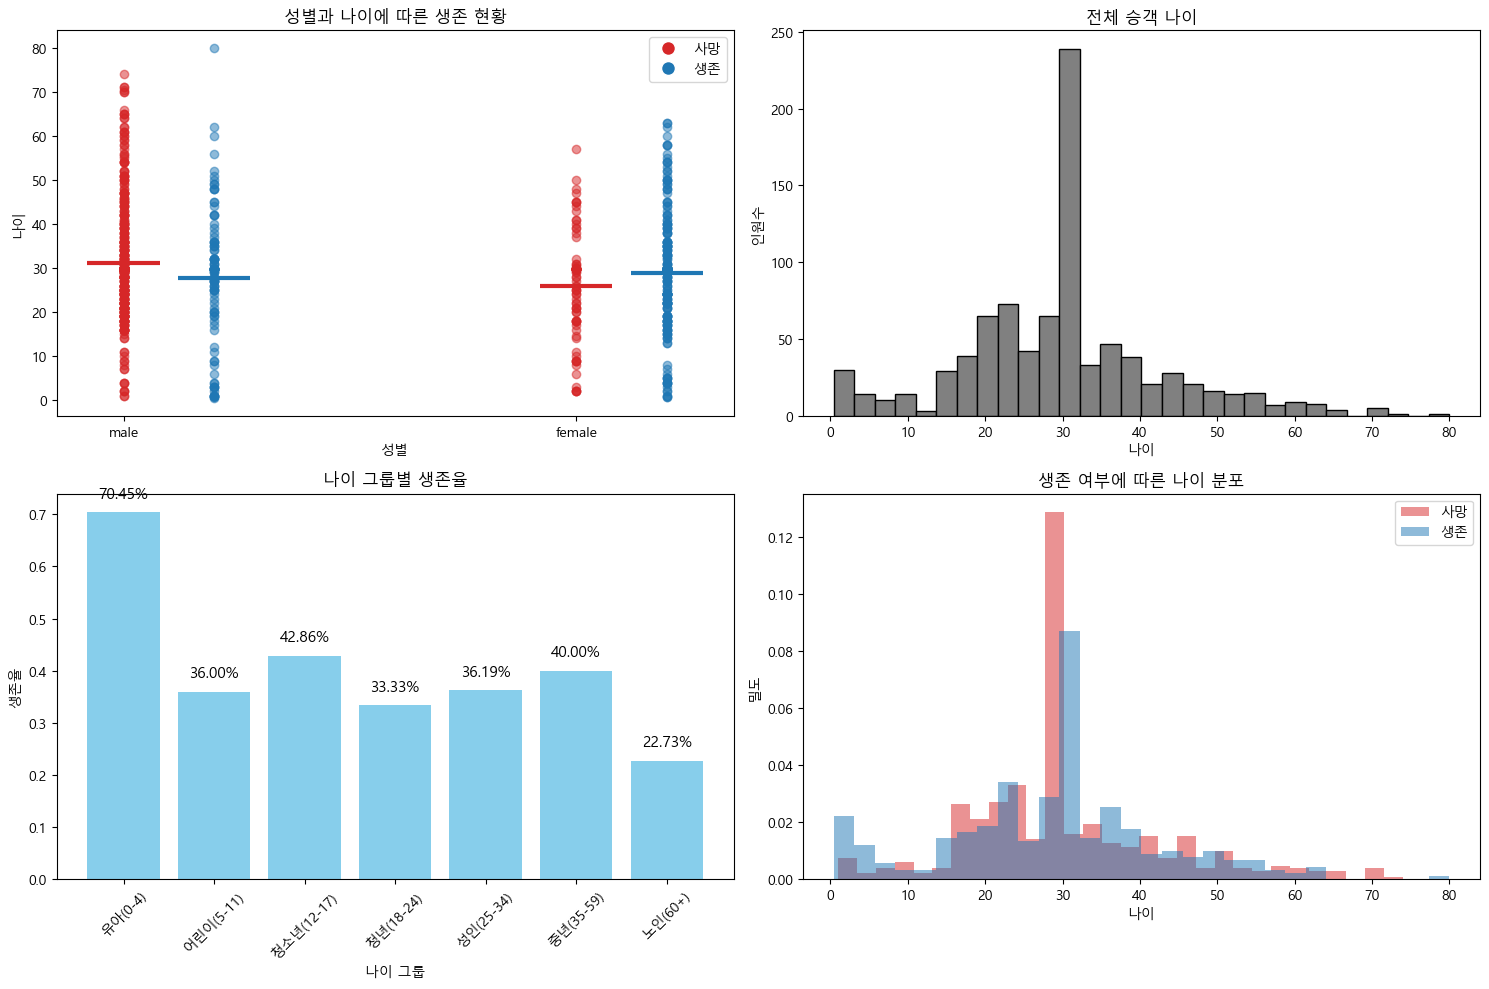

In [34]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# 1. 성별과 나이에 따른 생존 현황 (boxplot 대체: stripplot + 평균선)
sexes = df["sex"].unique()
survived_status = [0, 1]
colors = ["#d62728", "#1f77b4"]
for i, s in enumerate(survived_status):
    for j, sex in enumerate(sexes):
        y = df[(df["sex"] == sex) & (df["survived"] == s)]["age"].dropna()
        x = np.full_like(y, j + i*0.2, dtype=float)  # 약간 옆으로 치우치게
        axes[0, 0].scatter(x, y, alpha=0.5, color=colors[i], label="생존" if s==1 else "사망" if j==0 else None)
        # 평균선
        if len(y) > 0:
            axes[0, 0].hlines(y.mean(), j + i*0.2 - 0.08, j + i*0.2 + 0.08, color=colors[i], linewidth=3)
axes[0, 0].set_xticks([0, 1])
axes[0, 0].set_xticklabels(sexes)
axes[0, 0].set_title("성별과 나이에 따른 생존 현황")
axes[0, 0].set_xlabel("성별")
axes[0, 0].set_ylabel("나이")
handles = [
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=colors[0], label='사망', markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=colors[1], label='생존', markersize=10)
]
axes[0, 0].legend(handles=handles)

# 2. 전체 승객 나이 히스토그램
axes[0, 1].hist(df["age"].dropna(), bins=30, color="gray", edgecolor="black")
axes[0, 1].set_title("전체 승객 나이")
axes[0, 1].set_xlabel("나이")
axes[0, 1].set_ylabel("인원수")

# 3. 나이 그룹별 생존율 (barplot)
bins = [0, 5, 12, 18, 25, 35, 60, np.inf]
labels = [
    "유아(0-4)",
    "어린이(5-11)",
    "청소년(12-17)",
    "청년(18-24)",
    "성인(25-34)",
    "중년(35-59)",
    "노인(60+)",
]
df["age_group"] = pd.cut(df["age"], bins, labels=labels)
age_group_survived = df.groupby("age_group", observed=True)["survived"].mean().reindex(labels)
axes[1, 0].bar(labels, age_group_survived, color="skyblue")
axes[1, 0].set_title("나이 그룹별 생존율")
axes[1, 0].set_xlabel("나이 그룹")
axes[1, 0].set_ylabel("생존율")
axes[1, 0].tick_params(axis="x", rotation=45)
for i, v in enumerate(age_group_survived):
    if not np.isnan(v):
        axes[1, 0].text(i, v + 0.02, f"{v:.2%}", ha="center", va="bottom", fontsize=11)

# 4. 생존 여부에 따른 나이 분포 (히스토그램, 밀도)
for i, s in enumerate(survived_status):
    ages = df[df["survived"] == s]["age"].dropna()
    axes[1, 1].hist(ages, bins=30, density=True, alpha=0.5, color=colors[i], label="생존" if s==1 else "사망")
axes[1, 1].set_title("생존 여부에 따른 나이 분포")
axes[1, 1].set_xlabel("나이")
axes[1, 1].set_ylabel("밀도")
axes[1, 1].legend()

plt.tight_layout()
plt.show()